In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\reshm\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('customer_dataset.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID',axis=1,inplace=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
#totalcharges column should be numeric
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
#we need to avoid the strings and convert into numeric values
pd.to_numeric(df['TotalCharges'],errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]
#the columns having no totalcharges (blank)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()].shape

(11, 20)

In [11]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [12]:
df.iloc[488]['TotalCharges']

' '

In [13]:
df.shape

(7043, 20)

In [14]:
#out of 7043 rows 11 rows having no totalcharges .so dropping those 11 rows
df1=df[df['TotalCharges']!=' ']


In [15]:
df1.shape

(7032, 20)

In [16]:
#removed the string and now converting the TotalCharges column to numeric value
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'])

C:\Users\reshm\AppData\Local\Temp\ipykernel_6592\2044998813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'])


In [17]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Visualization

In [18]:
tenure_churn_no=df1[df1['Churn']=='No']['tenure']
tenure_churn_yes=df1[df1['Churn']=='Yes']['tenure']

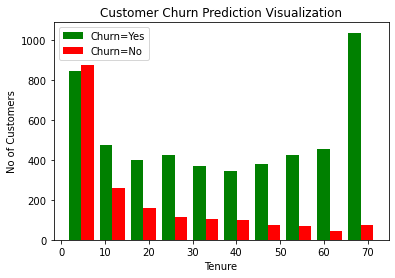

In [19]:
plt.hist([tenure_churn_no,tenure_churn_yes],color=['Green','Red'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Tenure')
plt.ylabel('No of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()

In [20]:
def print_unique_columns(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [21]:
print_unique_columns(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
#replacing 'No internet service' of columns TechSupport,StreamingTV ,StreamingMovies as 'No'
df1.replace('No internet service','No',inplace=True)

C:\Users\reshm\AppData\Local\Temp\ipykernel_6592\3611403801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [23]:
df1.replace('No phone service','No',inplace=True)

C:\Users\reshm\AppData\Local\Temp\ipykernel_6592\628100714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [24]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
print_unique_columns(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [26]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
               'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [27]:
for column in yes_no_columns:
    df1[column].replace({'Yes':1,'No':0},inplace=True)

C:\Users\reshm\AppData\Local\Temp\ipykernel_6592\586934259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column].replace({'Yes':1,'No':0},inplace=True)


In [28]:
for column in df1:
            print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [29]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\reshm\AppData\Local\Temp\ipykernel_6592\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [30]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [31]:
df2=pd.get_dummies(data=df1,columns=['Contract','InternetService','PaymentMethod'])

In [32]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1529,1,0,1,0,59,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2684,0,0,0,0,69,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4211,0,1,0,0,24,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0
3814,0,0,1,0,72,1,1,1,1,1,...,0,0,1,1,0,0,0,1,0,0


In [34]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year              

# Scaling

In [35]:
#columns -MonthlyCharges,TotalCharges,tenure need to scale
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
cols_to_scale=['MonthlyCharges','TotalCharges','tenure']
df2[cols_to_scale]=Scaler.fit_transform(df2[cols_to_scale])

In [36]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


# Model Building

In [37]:
X=df2.drop('Churn',axis=1)
Y=df2['Churn']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [39]:
X_train.shape

(5625, 26)

In [40]:
X_test.shape

(1407, 26)

In [41]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4954,0,0,0,1,0.000000,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3918,0,0,1,1,0.267606,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5406,0,0,1,1,0.985915,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1637,0,0,0,0,0.915493,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5191,1,0,1,1,0.309859,1,1,1,1,1,...,0,0,1,1,0,0,0,1,0,0
1761,0,0,0,0,0.802817,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1813,0,0,0,0,0.000000,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
4686,1,1,0,0,1.000000,1,1,1,1,1,...,0,0,1,0,1,0,1,0,0,0
6214,0,0,0,0,0.605634,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3551,1,0,0,1,0.000000,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    #keras.layers.Dense(15,input_shape=(26,),activation='relu')
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [44]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5197 - accuracy: 0.7337
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.7796
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.7888
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.7927
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.7957
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.7980
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.7996
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.7986
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.8004
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4189 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8153
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3928 - accuracy: 0.8148
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3928 - accuracy: 0.8146
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3928 - accuracy: 0.8144
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8137
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3920 - accuracy: 0.8164
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8139
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8151
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8142
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 

In [45]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.7996


[0.40201279520988464, 0.799573540687561]

In [46]:
y_predict=model.predict(X_test)
y_predict[:5]

44/44 [==============================] - 0s 831us/step


array([[0.00647107],
       [0.00585859],
       [0.14184177],
       [0.05171799],
       [0.03685556]], dtype=float32)

In [53]:
y_test[:10]

5401    0
1681    0
2076    0
3359    0
6629    0
149     0
1730    1
5971    0
3050    1
1183    0
Name: Churn, dtype: int64

In [50]:
y_pred=[]
for i in y_predict:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [52]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

In [54]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1046
           1       0.63      0.52      0.57       361

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

